In [303]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import Image
from wordcloud import WordCloud, STOPWORDS
from os import path
import nltk


%matplotlib inline
plt.style.use('ggplot')

pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 20)
pd.set_option('display.notebook_repr_html', True)



Original article:
http://kaylinwalker.com/50-years-of-pop-music/

In [304]:

# url='https://raw.githubusercontent.com/walkerkq/musiclyrics/master/billboard_lyrics_1964-2015.csv'
# df=pd.read_csv('https://raw.githubusercontent.com/walkerkq/musiclyrics/master/billboard_lyrics_1964-2015.csv')
# df.head()

In [305]:
# df.to_csv(path.join('..','datasets','songs.csv'))


In [306]:
df=pd.read_csv(path.join('..','datasets','songs.csv'))
df.drop(['Unnamed: 0'],inplace = True, axis = 1)
df.head()

,Rank,Song,Artist,Year,Lyrics,Source
0,1,wooly bully,sam the sham and the pharaohs,1965,sam the sham miscellaneous wooly bully wooly b...,3.0
1,2,i cant help myself sugar pie honey bunch,four tops,1965,sugar pie honey bunch you know that i love yo...,1.0
2,3,i cant get no satisfaction,the rolling stones,1965,,1.0
3,4,you were on my mind,we five,1965,when i woke up this morning you were on my mi...,1.0
4,5,youve lost that lovin feelin,the righteous brothers,1965,you never close your eyes anymore when i kiss...,1.0


# Wordclouds


(-0.5, 399.5, 199.5, -0.5)

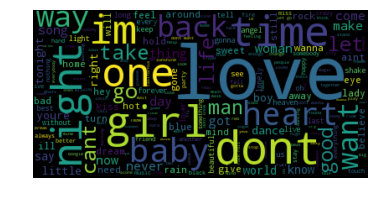

In [307]:
# Generate a word cloud image from Song Names
wordcloud = WordCloud().generate(' '.join(df['Song']))
# Display the generated image:
# the matplotlib way:

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

In [308]:
# store to file
wordcloud.to_file(path.join('..', 'assets', 'songs_cloud.png'))


(-0.5, 399.5, 199.5, -0.5)

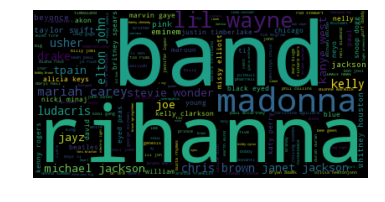

In [309]:
stopwords = set(STOPWORDS)
stopwords.add("featuring")

# generate word cloud
wordcloud2 = WordCloud(stopwords=stopwords)
wordcloud2.generate(' '.join(df['Artist']))


# Display the generated image:
# the matplotlib way:

plt.imshow(wordcloud2, interpolation='bilinear')
plt.axis("off")

In [310]:
wordcloud2.to_file(path.join('..', 'assets', 'artists_cloud.png'))

# Most Frequently in Billboard 100 List


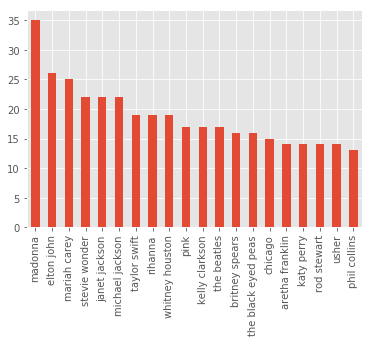

In [311]:
fig, ax = plt.subplots()
df['Artist'].value_counts()[:20].plot(ax=ax, kind='bar')
fig.savefig(path.join('..', 'assets', 'most_artists.png'))


# Average Hits Per Year vs Career Lifespan

In [312]:

grouped_df = df.groupby( [ "Artist"] ).size().reset_index(name = "Song_Count")
grouped_df['First_Year'] = 0
grouped_df['Last_Year'] = 0
grouped_df.head()

,Artist,Song_Count,First_Year,Last_Year
0,the mysterians,1,0,0
1,100 proof aged in soul,1,0,0
2,10000 maniacs,1,0,0
3,10cc,2,0,0
4,112,3,0,0


In [313]:
# for i in range(0, len(grouped_df)):
#     name = grouped_df.Artist[i]
#     rows = df[(df.Artist == name)]
#     grouped_df['First_Year'][i] = rows.Year.min()
#     grouped_df['Last_Year'][i] = rows.Year.max()

# grouped_df['Career_Span'] = grouped_df['Last_Year'] - grouped_df['First_Year']+1
# grouped_df.to_csv(path.join('..','datasets','grouped_songs.csv'))


In [314]:
grouped_df=pd.read_csv(path.join('..','datasets','grouped_songs.csv'))
grouped_df.drop(['Unnamed: 0'],inplace = True, axis = 1)
grouped_df.head()


,Artist,Song_Count,First_Year,Last_Year,Career_Span
0,the mysterians,1,1966,1966,1
1,100 proof aged in soul,1,1970,1970,1
2,10000 maniacs,1,1994,1994,1
3,10cc,2,1975,1977,3
4,112,3,1997,2001,5


In [315]:
grouped_df['Avg_Songs_Per_Year'] = grouped_df['Song_Count']/grouped_df['Career_Span']
grouped_df_min5 = grouped_df[(grouped_df.Song_Count > 4)]
grouped_df_min5.head()


,Artist,Song_Count,First_Year,Last_Year,Career_Span,Avg_Songs_Per_Year
16,3 doors down,8,2000,2008,9,0.888889
25,50 cent,5,2003,2005,3,1.666667
34,98 degrees,6,1997,2000,4,1.500000
38,aaliyah,11,1994,2003,10,1.100000
41,abba,6,1974,1981,8,0.750000


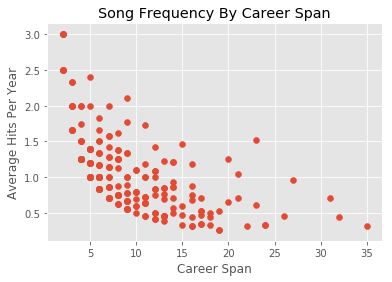

In [316]:
y = grouped_df_min5.Avg_Songs_Per_Year
x = grouped_df_min5.Career_Span
# plt.scatter(x, y, s=area, c=colors, alpha=0.5)


fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_title('Song Frequency By Career Span')
ax.set_xlabel('Career Span')
ax.set_ylabel('Average Hits Per Year')

plt.scatter(x,y)
plt.show()

In [317]:
fig.savefig(path.join('..', 'assets', 'song_frequency.png'))

# Career Span

In [318]:

grouped_df_top20 = grouped_df.nlargest(20, 'Song_Count')
grouped_df_top20.head()

,Artist,Song_Count,First_Year,Last_Year,Career_Span,Avg_Songs_Per_Year
1356,madonna,35,1984,2006,23,1.521739
681,elton john,26,1972,1998,27,0.962963
1367,mariah carey,25,1990,2009,20,1.250000
984,janet jackson,22,1986,2000,15,1.466667
1448,michael jackson,22,1972,2002,31,0.709677


In [319]:
min_xrange = grouped_df_top20.First_Year.min()
max_xrange = grouped_df_top20.Last_Year.max()
min_yrange = grouped_df_top20.Song_Count.min()
max_yrange = grouped_df_top20.Song_Count.max()

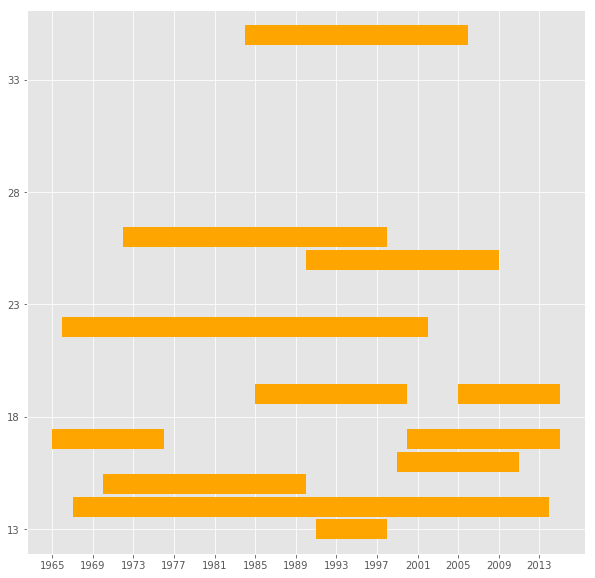

In [320]:
# for i in range(0,5):
fig = plt.figure(figsize=(10, 10)) 
ax = fig.add_subplot(111)

plt.plot([grouped_df_top20.First_Year, grouped_df_top20.Last_Year], [grouped_df_top20.Song_Count, grouped_df_top20.Song_Count], lw=20, color="orange", solid_capstyle="butt")

plt.yticks(range(min_yrange, max_yrange, 5))
plt.xticks(range(min_xrange, max_xrange, 4))

plt.show()

# Need help in labeling these charts with the name of the artist

In [321]:
fig.savefig(path.join('..', 'assets', 'career_range.png'))

In [322]:
df['Word_Count'] = 0
df['Word_Count'] = df['Lyrics'].str.split().str.len()
df.head()

,Rank,Song,Artist,Year,Lyrics,Source,Word_Count
0,1,wooly bully,sam the sham and the pharaohs,1965,sam the sham miscellaneous wooly bully wooly b...,3.0,125.0
1,2,i cant help myself sugar pie honey bunch,four tops,1965,sugar pie honey bunch you know that i love yo...,1.0,204.0
2,3,i cant get no satisfaction,the rolling stones,1965,,1.0,0.0
3,4,you were on my mind,we five,1965,when i woke up this morning you were on my mi...,1.0,152.0
4,5,youve lost that lovin feelin,the righteous brothers,1965,you never close your eyes anymore when i kiss...,1.0,232.0


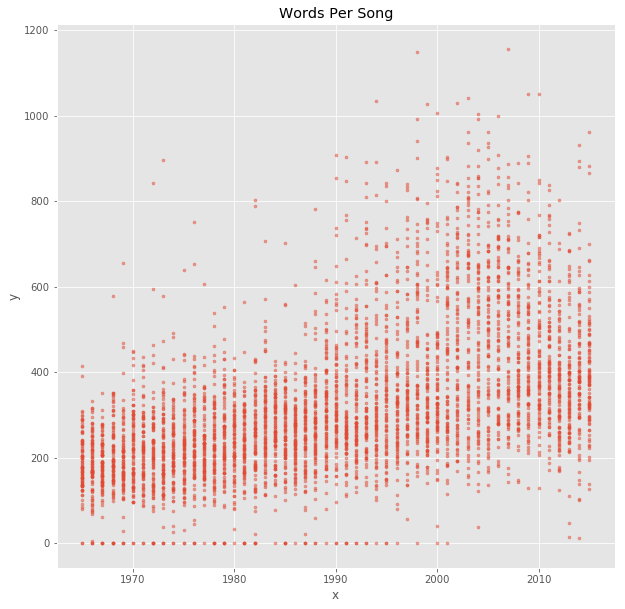

In [341]:
# Create data
N = 500
x = df.Year
y = df.Word_Count
colors = (0,0,0)
area = np.pi*3

fig = plt.figure(figsize=(10, 10)) 
ax = fig.add_subplot(111)
 
# Plot
plt.scatter(x, y, s=area, alpha=0.5)
plt.title('Words Per Song')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [342]:
fig.savefig(path.join('..', 'assets', 'wordspersong.png'))

In [324]:
def unique_count(lyrics):
    count = 0
    words = lyrics.split(" ")   
    unique_words =[]
    for word in words:
        if word not in unique_words:
            if word:
                unique_words.append(word)

#     print "words:", words
#     print "unique words:", unique_words
#     print "count", len(unique_words)
    return len(unique_words) 




In [325]:
df['Unique_Word_Count'] = 0
df.head()

,Rank,Song,Artist,Year,Lyrics,Source,Word_Count,Unique_Word_Count
0,1,wooly bully,sam the sham and the pharaohs,1965,sam the sham miscellaneous wooly bully wooly b...,3.0,125.0,0
1,2,i cant help myself sugar pie honey bunch,four tops,1965,sugar pie honey bunch you know that i love yo...,1.0,204.0,0
2,3,i cant get no satisfaction,the rolling stones,1965,,1.0,0.0,0
3,4,you were on my mind,we five,1965,when i woke up this morning you were on my mi...,1.0,152.0,0
4,5,youve lost that lovin feelin,the righteous brothers,1965,you never close your eyes anymore when i kiss...,1.0,232.0,0


In [326]:
lyrics = "this is is totally totally awesome"
unique_word_count = unique_count(lyrics)
unique_word_count

4

In [335]:
length = len(df)
df_new = df



In [336]:
# df_new.dropna('Lyrics', inplace = True)
# DataFrame.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)
df_new.dropna(subset = ['Lyrics'], inplace = True)
df_new.reset_index(inplace=True)
new_length = len(df_new)
print new_length
df_new.head(43)

4913


,index,Rank,Song,Artist,Year,Lyrics,Source,Word_Count,Unique_Word_Count
0,0,1,wooly bully,sam the sham and the pharaohs,1965,sam the sham miscellaneous wooly bully wooly b...,3.0,125.0,64
1,1,2,i cant help myself sugar pie honey bunch,four tops,1965,sugar pie honey bunch you know that i love yo...,1.0,204.0,94
2,2,3,i cant get no satisfaction,the rolling stones,1965,,1.0,0.0,0
3,3,4,you were on my mind,we five,1965,when i woke up this morning you were on my mi...,1.0,152.0,44
4,4,5,youve lost that lovin feelin,the righteous brothers,1965,you never close your eyes anymore when i kiss...,1.0,232.0,88
5,5,6,downtown,petula clark,1965,when youre alone and life is making you lonel...,1.0,239.0,120
6,6,7,help,the beatles,1965,help i need somebody help not just anybody hel...,3.0,228.0,76
7,7,8,cant you hear my heart beat,hermans hermits,1965,carterlewis every time i see you lookin my way...,5.0,215.0,72
8,8,9,crying in the chapel,elvis presley,1965,you saw me crying in the chapel the tears i s...,1.0,148.0,79
9,9,10,my girl,the temptations,1965,ive got sunshine on a cloudy day when its cold...,3.0,153.0,61


In [338]:
i = 0
for i in range(new_length): 
    uniqueCount = unique_count(df_new.Lyrics[i])
    df_new.Unique_Word_Count[i] = uniqueCount

df_new.tail(20)   

/Users/manulohiya/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,index,Rank,Song,Artist,Year,Lyrics,Source,Word_Count,Unique_Word_Count
4893,5079,80,bang bang,jessie j ariana grande and nicki minaj,2015,verse 1 jessie j she got a body like an hourgl...,3.0,380.0,164
4894,5080,81,lay me down,sam smith,2015,yes i do i believe that one day i will be whe...,1.0,201.0,100
4895,5081,82,tuesday,ilovemakonnen featuring drake,2015,hook x4 club goin up on a tuesday got your gir...,3.0,328.0,172
4896,5082,83,hit the quan,ilovememphis,2015,yo yo aye im finna aye im finnaim finna show ...,1.0,452.0,168
4897,5083,84,downtown,macklemore and ryan lewis featuring eric nally...,2015,i went to the moped store said fuck it salesm...,1.0,699.0,301
4898,5084,85,house party,sam hunt,2015,youre on the couch blowing up my phone you do...,1.0,335.0,105
4899,5085,86,ayo,chris brown and tyga,2015,i need you i need you i need you i need you i...,1.0,600.0,212
4900,5086,87,kick the dust up,luke bryan,2015,all week long its a farmin town theyre makin ...,1.0,321.0,124
4901,5087,88,blessings,big sean featuring drake,2015,look i feel blessed way up i feel blessed way...,1.0,881.0,331
4902,5088,89,budapest,george ezra,2015,my house in budapest my hidden treasure chest...,1.0,227.0,76


In [345]:
df_new.to_csv(path.join('..','datasets','unique_words.csv'))

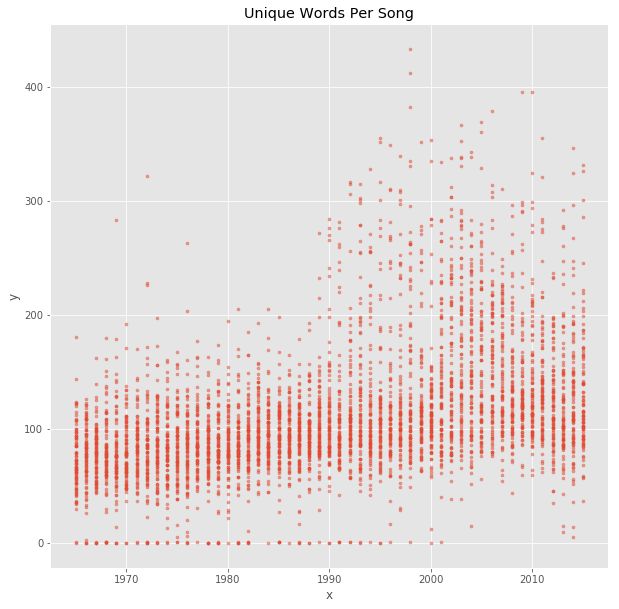

In [343]:
# Create data
N = 500
x = df_new.Year
y = df_new.Unique_Word_Count
colors = (0,0,0)
area = np.pi*3


fig = plt.figure(figsize=(10, 10)) 
ax = fig.add_subplot(111)

# Plot
plt.scatter(x, y, s=area, alpha=0.5)
plt.title('Unique Words Per Song')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [344]:
fig.savefig(path.join('..', 'assets', 'uniquewordspersong.png'))